In [3]:
!pip install pandas==0.24.2
!pip install --user pandas_ml==0.6.1
!pip install matplotlib==3.1.0
!pip install seaborn
!pip install pydot
!pip install graphviz
!pip install scikit-learn
!pip install sklearn-pandas


     |████████████████████████████████| 10.1MB 6.0MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
  Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1
     |████████████████████████████████| 102kB 7.5MB/s ta 0:00:011
     |████████████████████████████████| 13.1MB 6.4MB/s eta 0:00:01    |████████████▋                   | 5.2MB 6.4MB/s eta 0:00:02
  Found existing installation: matplotlib 3.0.2
    Uninstalling matplotlib-3.0.2:
      Successfully uninstalled matplotlib-3.0.2


In [31]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats


import pandas as pd, numpy as np
import sys
import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cdf7dc85b66f4864b5439b867a190880 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7dr2wXqxmP7eZLWmwTZXsGECCSV64edqpDK_TRbDHBof',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_cdf7dc85b66f4864b5439b867a190880.get_object(Bucket='smartintern-donotdelete-pr-dkodsuvwqgcwgb',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_pd = pd.read_csv(body)
df_pd.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis


In [6]:

df_pd.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
#note above only 'country' and 'status' are categorical objects
#need encoding

In [8]:
# sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
# ax = sns.distplot(df_pd['Life expectancy '].nununique(dropna=True))
# # data["Team"].nunique(dropna = True) 
# plt.show()
df_pd['Life expectancy '].head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [9]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_pd.count()))


The dataset contains following number of records for each of the columns : 
Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64


In [10]:
df_pd.columns[df_pd.isnull().any()]
#this is the list of columns that need immputing

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
df_pd.nunique()
#should we keep status? seems highy influential categorically

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [12]:
df_pd.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# The following is the correlation matrice between the various features of the given dataset

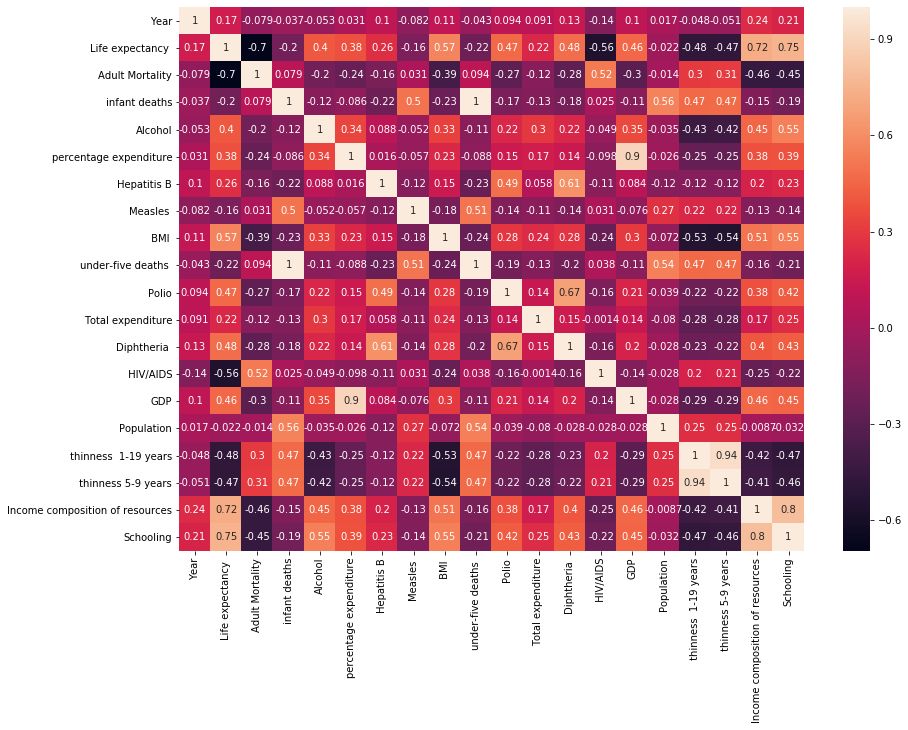

In [16]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_pd.corr(), annot = True)

In [17]:
# Defining the categorical columns 
categoricalColumns = df_pd.select_dtypes(include=[np.object]).columns

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical =  SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
Index(['Country', 'Status'], dtype='object')


In [18]:
numericalColumns = [col for col in df_pd.select_dtypes(include=[np.float,np.int]).columns if col not in ['Life expectancy ']]
print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()
impute_numerical =  SimpleImputer(strategy="mean")

numerical_transformer = Pipeline(steps=[('impute',impute_numerical),('scale',scaler_numerical)])

Numerical columns : 
['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [19]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")

In [20]:
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)
df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

print(df_pd_temp.shape)

df_pd_temp_2.shape

Data after transforming :
  (0, 0)	1.0
  (0, 194)	1.0
  (0, 195)	2015.0
  (0, 196)	65.0
  (0, 197)	263.0
  (0, 198)	62.0
  (0, 199)	0.01
  (0, 200)	71.27962362
  (0, 201)	65.0
  (0, 202)	1154.0
  (0, 203)	19.1
  (0, 204)	83.0
  (0, 205)	6.0
  (0, 206)	8.16
  (0, 207)	65.0
  (0, 208)	0.1
  (0, 209)	584.2592099999999
  (0, 210)	33736494.0
  (0, 211)	17.2
  (0, 212)	17.3
  (0, 213)	0.479
  (0, 214)	10.1
  (1, 0)	1.0
  (1, 194)	1.0
  (1, 195)	2014.0
  :	:
  (2936, 211)	1.6
  (2936, 212)	1.7
  (2936, 213)	0.42700000000000005
  (2936, 214)	9.8
  (2937, 192)	1.0
  (2937, 194)	1.0
  (2937, 195)	2000.0
  (2937, 196)	46.0
  (2937, 197)	665.0
  (2937, 198)	24.0
  (2937, 199)	1.68
  (2937, 201)	79.0
  (2937, 202)	1483.0
  (2937, 203)	25.5
  (2937, 204)	39.0
  (2937, 205)	78.0
  (2937, 206)	7.1
  (2937, 207)	78.0
  (2937, 208)	43.5
  (2937, 209)	547.3588785000001
  (2937, 210)	12222251.0
  (2937, 211)	11.0
  (2937, 212)	11.2
  (2937, 213)	0.434
  (2937, 214)	9.8
Data after transforming :
  (0, 0)	1

(2938, 215)

In [22]:
import sklearn
features = []
features = df_pd.drop(['Life expectancy '], axis=1)
life_transformer = Pipeline(steps=[('impute',impute_numerical)])
preprocessorForLifeExpectancy = ColumnTransformer(transformers=[('num',life_transformer,['Life expectancy '])],
                                            remainder="passthrough")
label = pd.DataFrame(df_pd, columns = ['Life expectancy ']) 

label=preprocessorForLifeExpectancy.fit_transform(label)
label2=pd.DataFrame(label,columns=['Life expectancy'])
label2.head()
label2['Life expectancy'].count()

2938

# Model Training and Comparison

### Multiple Linear Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
        features, label, train_size = 0.7, test_size = 0.3)
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(2056, 21) Output label(2056, 1)
Dimensions of datasets that will be used for testing : Input features(882, 21) Output label(882, 1)


In [24]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', mlRegressor)])

mlr_model.fit(X_train,y_train)

y_pred_mlr= mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [25]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()


In [26]:
mlrMetrics = model_metrics(mlRegressor,y_test,y_pred_mlr)


Mean squared error: 3.68
R2 score: 0.96


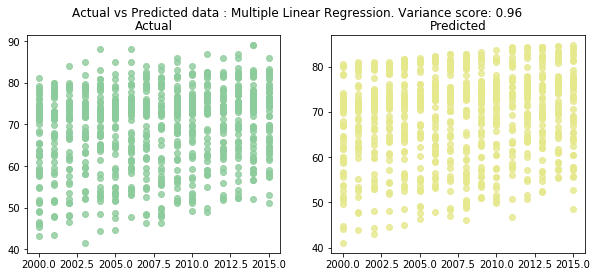

In [27]:
two_d_compare(X_test['Year'],y_test,y_pred_mlr,model_name)


### Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)]) 

rfr_model.fit(X_train,y_train)



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('preprocessorAll', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_...imators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])

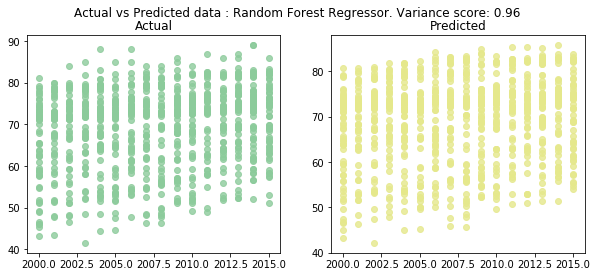

Mean squared error: 3.41
R2 score: 0.96


In [29]:
y_pred_rfr = rfr_model.predict(X_test)
two_d_compare(X_test['Year'],y_test,y_pred_rfr,model_name)
rfrMetrics = model_metrics(randomForestRegressor,y_test,y_pred_rfr)

### Ridge Regression

In [35]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)


grid_cv = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', grid_cv)]) 

grid_cv.fit(X_train,y_train)
y_pred_ridge = grid_cv.predict(X_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The ma

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The ma

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The ma

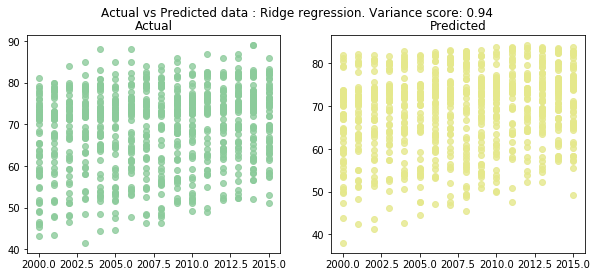

Mean squared error: 5.26
R2 score: 0.94


In [36]:
two_d_compare(X_test['Year'],y_test,y_pred_ridge,"Ridge regression")
ridgemetrics = model_metrics(grid_cv,y_test,y_pred_ridge)

### Elastic Net Regression

In [39]:
scoring = make_scorer(r2_score)

grid_cv_elastic = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)
grid_cv_elastic= Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', grid_cv_elastic)]) 

grid_cv_elastic.fit(X_train,y_train)
y_pred_elastic = grid_cv_elastic.predict(X_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

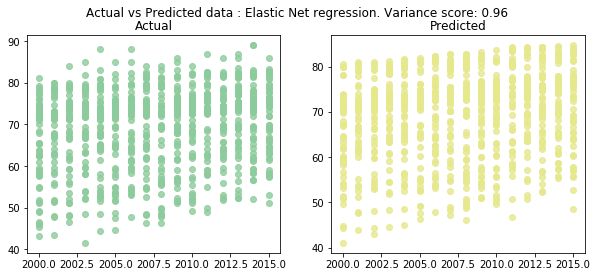

Mean squared error: 3.72
R2 score: 0.96


In [40]:
two_d_compare(X_test['Year'],y_test,y_pred_elastic,"Elastic Net regression")
elasticmetrics = model_metrics(grid_cv_elastic,y_test,y_pred_elastic)

# Conclusion

After comparing from a few models, we find that the random forest model provides with the highest R2 score as well as the lowest MSE, while the Elastic net regression model provides with the same R2 score but a lower Mean squared Error, hence we shall deploy the Random Forest Model to suit our needs 

# Deployment

In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient



In [4]:
wml={
    "apikey": "gL0mTy73-Xkj8UktiFGpDJZMNMjTpg2EMj202ShTUliZ",
  "iam_apikey_description": "Auto-generated for key 2e716a32-3720-4736-90b0-92a3be9418bc",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/e9308cb702954473ad588b5605f7dd0a::serviceid:ServiceId-6c2e4008-62c5-4c2a-abcb-54cbf3e2caf5",
  "instance_id": "d7e1741a-2dc9-4a73-97e0-c57c714c9857",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [6]:
client = WatsonMachineLearningAPIClient(wml)
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "kanishk", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "kanishkgupta2000@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Predicting Life Expectancy Using Regression"}


In [52]:
model_artifact =client.repository.store_model(rfr_model, meta_props=model_props)


In [7]:
client.repository.list()



------------------------------------  -------------------------------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK          TYPE
9838a960-afbf-4732-b618-5d76e525b767  Predicting Life Expectancy Using Regression  2020-06-01T14:22:34.474Z  scikit-learn-0.20  model
c201e6df-6a1f-4250-bbfd-47b6d3c1afaa  MyModel                                      2020-05-21T15:09:25.461Z  scikit-learn-0.19  model
9982c543-851a-44a1-b570-d6c7e92ed07f  Life Expectancy using Random Forest          2020-06-01T14:23:29.257Z  scikit-learn-0.20  online deployment
07564e55-7522-4497-80d9-7b753c2a5664  MyDeployment                                 2020-05-21T15:10:07.161Z  scikit-learn-0.19  online deployment
------------------------------------  -------------------------------------------  ------------------------  -----------------  -----------------


In [8]:
published_model_uid = client.repository.get_model_uid(model_artifact)
created_deployment = client.deployments.create(published_model_uid, name="Life Expectancy using Random Forest")

NameError: name 'model_artifact' is not defined

In [55]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d7e1741a-2dc9-4a73-97e0-c57c714c9857/deployments/9982c543-851a-44a1-b570-d6c7e92ed07f/online


In [1]:
#mockup for testing deployment at endpoint
# scoring_payload = {"fields": ["Age","Salary"],"values": [[25,50000]]}
# predictions = client.deployments.score(scoring_endpoint, scoring_payload)
# print(predictions)
client.deployments.list("de8eebf1-7c57-429d-9831-21c5fd4912a3")

NameError: name 'client' is not defined